In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#transition frequencies in arbitrary unit
omega1=10
omega2=12
hyperfine=omega2-omega1

In [3]:
#defining basis and the deacay rate for 3->1 and 3->2 relaxation.
ground1=basis(3,0)
ground2=basis(3,1)
excited=basis(3,2)
gamma13=0.1
gamma23=0.1

In [4]:
#initial state, this shouldn't affect steady state solution.
init=0.5*ground1*ground1.dag()+0.5*ground2*ground2.dag()
init

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0. ]]

In [5]:
#define rabi frequencies and the range of the scanned detuning
rabi1=0.25
rabi2=0.25
deltalist = np.linspace(-2,2,301)

rho_33 = []
rho_31 = []
rho_13 = []
chi = []


In [ ]:
#define collapse operator and write the off-diagonal hamiltonian parts.
col1=np.sqrt(gamma13)*ground1*excited.dag()
col2=np.sqrt(gamma23)*ground2*excited.dag()
collapse=[col1,col2]
sig31=excited*ground1.dag()
Hup=rabi1*ground1*excited.dag()+rabi2*ground2*excited.dag()
Hdown=Hup.dag()

In [6]:
#scan the detuning with each time modifying the diagonal part of H
for Delta in deltalist:
    omegaL1=omega2+Delta/2
    omegaL2=omega1-Delta/2
    Hdiag=(hyperfine-omegaL1+omegaL2)*ground2*ground2.dag()+(-omegaL1+omega2)*excited*excited.dag()
    H=Hup+Hdiag+Hdown
    rho_ss = steadystate(H,collapse)
    
    # save values for plotting later:
    rho_33.append(rho_ss[2,2])  # save the exited state population
    rho_31.append(rho_ss[2,0])  # save the ground-excited coherence
    rho_13.append(rho_ss[0,2])
    
    chi.append(expect(sig31,rho_ss)) 


Text(0, 0.5, '$\\hat{\\rho}_{33}$')

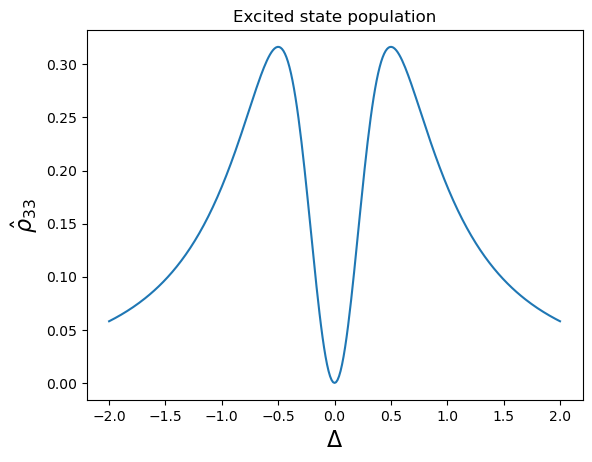

In [9]:
fsize = {'fontsize':'16'}
plt.plot(deltalist,np.real(rho_33))
plt.title("Excited state population")
plt.xlabel("$\Delta$",**fsize)
plt.ylabel("$\hat{\\rho}_{33}$",**fsize)

Text(0.5, 0, '$\\Delta$')

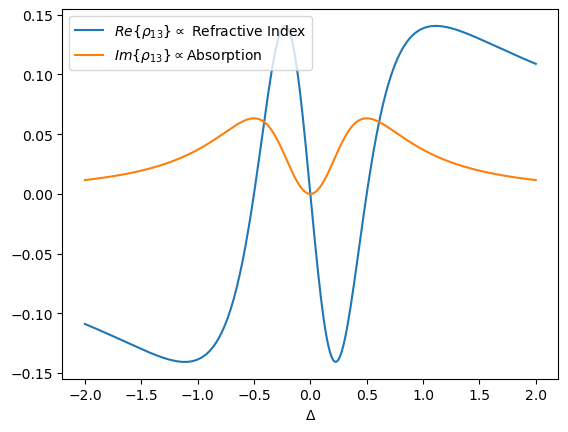

In [10]:
plt.plot(deltalist,np.real(chi),label="$Re\{\\rho_{13}\}  \propto$ Refractive Index")
plt.plot(deltalist,np.imag(chi),label="$Im\{\\rho_{13}\} \propto $Absorption")
plt.legend()
plt.xlabel("$\Delta$")

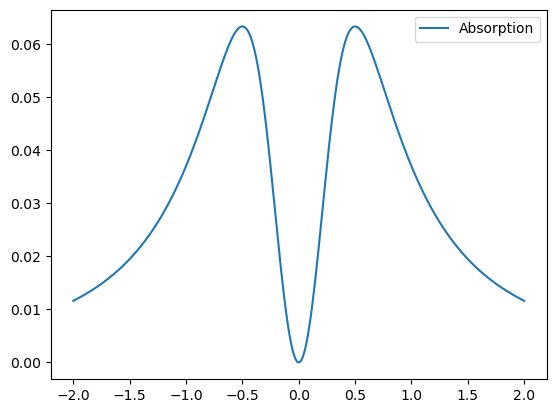

In [11]:
plt.plot(deltalist,np.imag(chi),label="Absorption")
plt.legend()

Text(0.5, 0, '$\\Delta$')

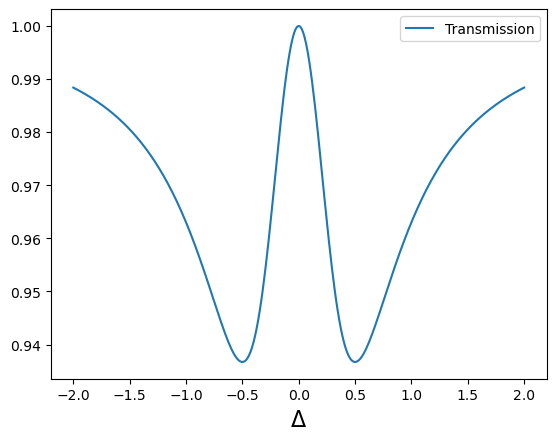

In [12]:
plt.plot(deltalist,1-np.imag(chi),label="Transmission")
plt.legend()
plt.xlabel("$\Delta$",**fsize)